# Machine learning:

Ml is a subset of artificial intelligence that uses techniques (such as deep learning) that enable machines to use experience to improve at tasks. The learning process is based on the following steps:

    Feed data into an algorithm. (In this step you can provide additional information to the model, for example, by performing feature extraction.)
    Use this data to train a model.
    Test and deploy the model.
    Consume the deployed model to do an automated predictive task. (In other words, call and use the deployed model to receive the predictions returned by the model.)

Evaluation:

1) Use F1-score as the evaluation metric in such cases(highly imbalanced data).

2) Use stratified sampling while train_test split.

# Importing the Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read dataset to pandas dataframe
dataset = pd.read_csv("C:/Users/rzouga/Downloads/harvard/shopping/shopping/shopping.csv")
dataset.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


# Exploratory data analysis 

In [8]:
dataset.shape

(12330, 18)

In [10]:
dataset.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [11]:
dataset.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

# Preprocessing

## Encoding data columns

Various machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In [15]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
dataset['Month'] = le.fit_transform(dataset['Month'])
dataset['VisitorType'] = le.fit_transform(dataset['VisitorType'])
dataset['Weekend'] = le.fit_transform(dataset['Weekend'])
dataset['Revenue'] = le.fit_transform(dataset['Revenue'])
dataset.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

# features and target
The next step is to split our dataset into its attributes and labels. To do so, use the following code:

In [19]:

evidence = dataset.drop('Revenue',axis=1)
labels = dataset['Revenue']
print(evidence.columns)

print(evidence.shape)
print(labels.shape)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')
(12330, 17)
(12330,)


In [ ]:
#Let's create numpy arrays for features and target
evidence = dataset.drop('Revenue',axis=1).values
labels = dataset['Revenue'].values

# Feature Scaling

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(evidence)

evidence = scaler.transform(evidence)


## Train Test Split

To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

To create training and test splits, execute the following script:

In [24]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.4
X_train, X_test, y_train, y_test = train_test_split(
        evidence, labels, test_size=TEST_SIZE
    )

# Training and Predictions

It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, we chose 1.
The final step is to make predictions on our test data. To do so, execute the following script:

In [31]:
y_pred = model.predict(X_test)

# Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:


## Confusion Matrix
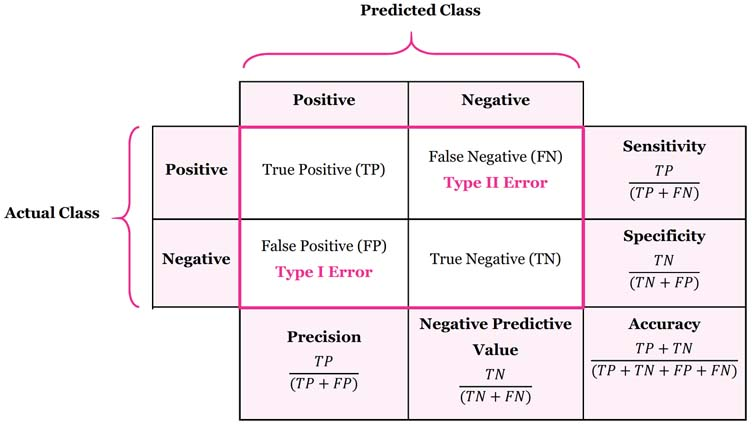

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.


In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

[[3820  365]
 [ 399  348]]


Predicted,0,1,All
True,,,
0,3820,365,4185
1,399,348,747
All,4219,713,4932


Considering confusion matrix above:

True negative = 3820

False positive = 365

True postive = 348

Fasle negative = 399



## ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy


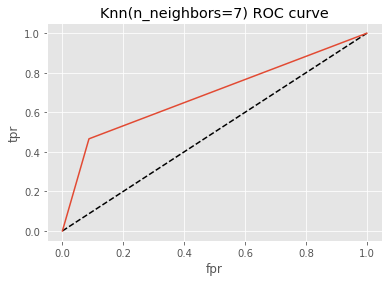

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
plt.style.use('ggplot')
y_pred_proba = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=1) ROC curve')
plt.show()

In [47]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.689323602654345



# Classification Report

Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4185
           1       0.49      0.47      0.48       747

    accuracy                           0.85      4932
   macro avg       0.70      0.69      0.69      4932
weighted avg       0.84      0.85      0.84      4932



In [53]:
# Print results
TN, FP, FN, TP = confusion_matrix(y_test,y_pred).ravel()
# Sensitivity, hit rate, recall, or true positive rate
sensitivity = TP/(TP+FN)
# Specificity or true negative rate
specificity = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
 
print(f"Correct: {(y_test == y_pred).sum()}")
print(f"Incorrect: {(y_test != y_pred).sum()}")
print(f"True Positive Rate: {100 * sensitivity:.2f}%")
print(f"True Negative Rate: {100 * specificity:.2f}%")
print(f"Overall accuracy: {100 * ACC:.2f}%")

Correct: 4168
Incorrect: 764
True Positive Rate: 46.59%
True Negative Rate: 91.28%
Overall accuracy: 84.51%




# Cross Validation

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

# Hyperparameter tuning

The value of k (i.e 1) . 

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.


In [38]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(evidence,labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [41]:
knn_cv.best_score_

0.878588807785888

In [42]:
knn_cv.best_params_

{'n_neighbors': 13}



Thus a knn classifier with number of neighbors as 13 achieves the best score/accuracy of 0.878588 i.e about 87,85%
